# Plots of AMS annual meeting Jan 2025

1. OLR & convective organization plot
2. mhist rice vs icnc
3. mhist rice vs icnc + bcu and nuc mean
4. vertical profiles
5. cross section snapshots
6. IWP vs height
   


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import ticker
import dask
from matplotlib.gridspec import GridSpec
from scipy import stats
import util

from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

plt.rcParams.update({"font.size": 18})  # all to 18 if not specified other

cb_colors = ['#377eb8', '#ff7f00', '#4daf4a',
             '#f781bf', '#a65628', '#984ea3',
             '#999999', '#e41a1c', '#dede00']
do_var=False
add_iwc_contours=True
rain_factor = 3600*1000  # mm/day

In [2]:
run_dir = "/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/"
run = "dpscream_rce_large_3km_lpls300k_wbranch"
file = run_dir+f"{run}/run/{run}.eam.h0.2000-02-20-10800.nc"
# file = run_dir+f"{run}/run/{run}_h0_last5days.nc"
chunks = {'time':20,'ncol':-1,'lev':-1}
qsmall=1e-8

In [3]:
# This custom formatter removes trailing zeros, e.g. "1.0" becomes "1", and
# then adds a percent sign.
def fmt(x):
    s = f"{x:.1e}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"


## OLR movie

In [25]:
ds = xr.open_dataset(file.replace("h0","h1"), chunks=chunks)[['FLUT','time','crm_grid_x', 'crm_grid_y', 'TMQ']]
ds.TMQ

<xarray.DataArray 'TMQ' (time: 40, ncol: 147456)> Size: 24MB
dask.array<open_dataset-TMQ, shape=(40, 147456), dtype=float32, chunksize=(20, 147456), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 320B 2000-02-20 03:00:00 ... 2000-02-25 00:00:00
Dimensions without coordinates: ncol
Attributes:
    units:          kg/m2
    long_name:      Total (vertically integrated) precipitable water
    standard_name:  atmosphere_mass_content_of_water_vapor
    cell_methods:   time: point

In [26]:
ndays = int((ds.time[-1]-ds.time[0]).values/1e9/3600/24) # for branch
print(ds.time[0].values, ds.time[1].values, len(ds.time),"nsteps and ", ndays,"days")
olr = ds.FLUT
pw = ds.TMQ
pw_anom = pw - pw.mean(dim=['ncol'])
pw_var = pw_anom.var(dim=['ncol']).values
x = ds.crm_grid_x/1000
y = ds.crm_grid_y/1000
days = np.linspace(0,ndays,len(ds.time))
print(x.shape, olr.shape, days.shape)
del ds, pw, pw_anom

2000-02-20 03:00:00 2000-02-20 06:00:00 40 nsteps and  4 days
[########################################] | 100% Completed | 815.54 ms
[########################################] | 100% Completed | 915.30 ms
(40, 147456) (40, 147456) (40,)


188 2000-02-17 00:00:00
[########################################] | 100% Completed | 205.19 ms
[########################################] | 100% Completed | 113.76 ms
[########################################] | 100% Completed | 111.41 ms
[########################################] | 100% Completed | 113.26 ms
[########################################] | 100% Completed | 212.78 ms
[########################################] | 100% Completed | 109.84 ms
saved as ../plots/ams25/olr_pwvar_dpscream_rce_large_3km_lpls300k_47.00.png


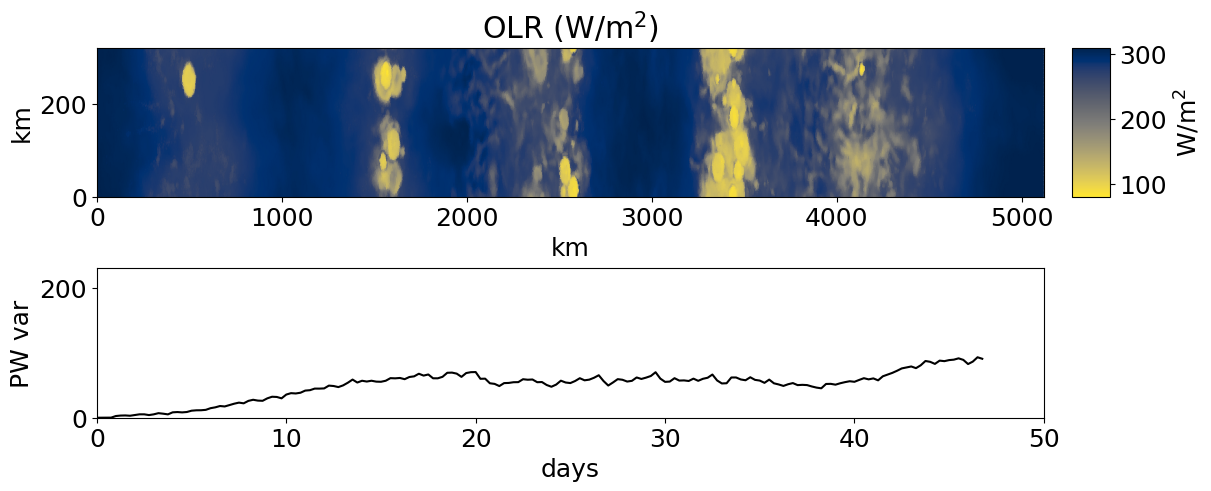

189 2000-02-17 06:00:00
[########################################] | 100% Completed | 306.69 ms
[########################################] | 100% Completed | 224.25 ms
[########################################] | 100% Completed | 112.93 ms
[########################################] | 100% Completed | 112.47 ms
[########################################] | 100% Completed | 214.15 ms
[########################################] | 100% Completed | 109.79 ms
saved as ../plots/ams25/olr_pwvar_dpscream_rce_large_3km_lpls300k_47.25.png


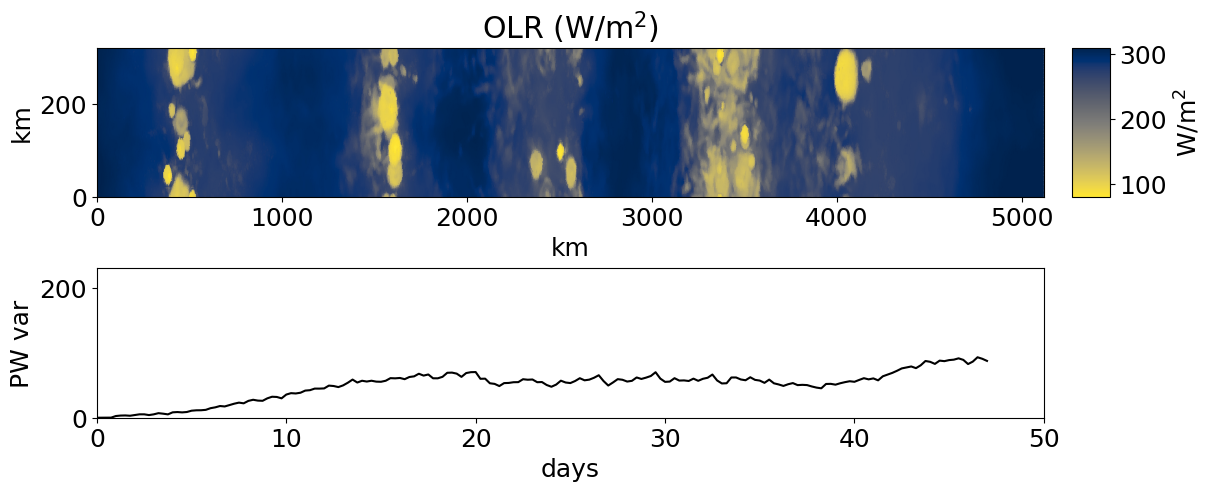

190 2000-02-17 12:00:00
[########################################] | 100% Completed | 204.67 ms
[########################################] | 100% Completed | 112.86 ms
[########################################] | 100% Completed | 112.64 ms
[########################################] | 100% Completed | 111.73 ms
[########################################] | 100% Completed | 112.43 ms
[########################################] | 100% Completed | 110.15 ms
saved as ../plots/ams25/olr_pwvar_dpscream_rce_large_3km_lpls300k_47.50.png


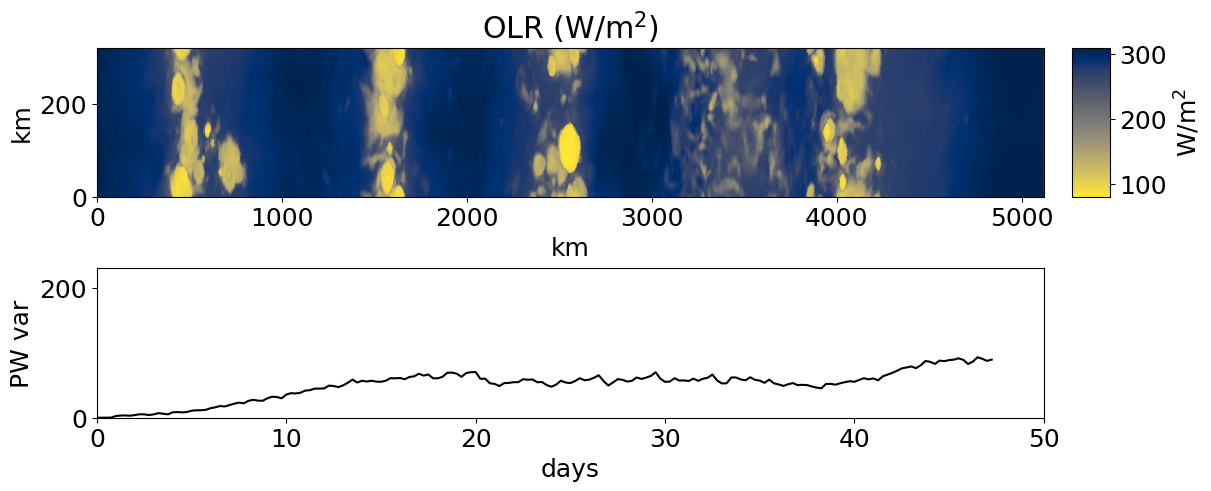

191 2000-02-17 18:00:00
[########################################] | 100% Completed | 113.26 ms
[########################################] | 100% Completed | 122.15 ms
[########################################] | 100% Completed | 111.63 ms
[########################################] | 100% Completed | 111.47 ms
[########################################] | 100% Completed | 111.48 ms
[########################################] | 100% Completed | 109.86 ms
saved as ../plots/ams25/olr_pwvar_dpscream_rce_large_3km_lpls300k_47.75.png


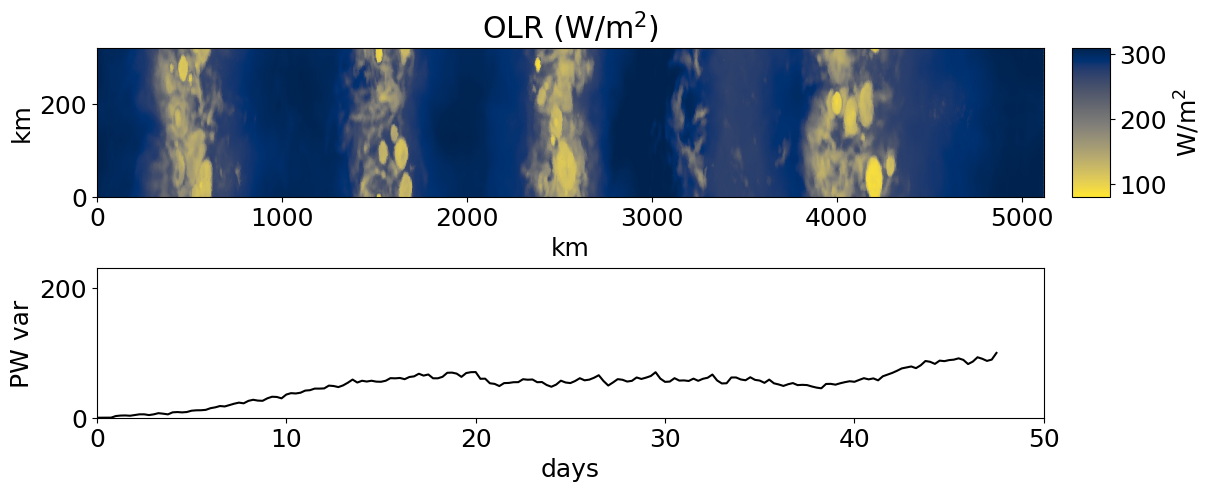

192 2000-02-18 00:00:00
[########################################] | 100% Completed | 109.77 ms
[########################################] | 100% Completed | 122.82 ms
[########################################] | 100% Completed | 112.84 ms
[########################################] | 100% Completed | 112.22 ms
[########################################] | 100% Completed | 112.25 ms
[########################################] | 100% Completed | 109.68 ms
saved as ../plots/ams25/olr_pwvar_dpscream_rce_large_3km_lpls300k_48.00.png


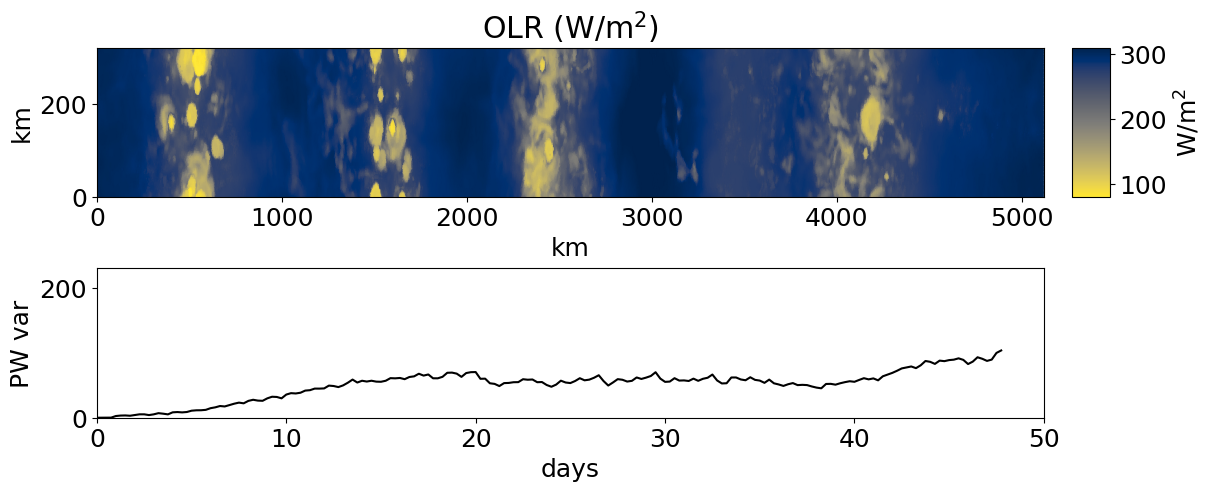

In [12]:
cmapr="cividis_r"

# do it only 60 at a time to not go over the memory limit
for t in range(47*4,48*4+1,1):  # range(len(olr.time)-2):
    print(t, olr[t].time.values)
    fig = plt.figure(figsize=plt.figaspect(0.4), layout='constrained')
    gs = GridSpec(2, 2, figure=fig, width_ratios=[100,4])
    ax0 = fig.add_subplot(gs[0,0])
    ax1 = fig.add_subplot(gs[1,0])
    cax = fig.add_subplot(gs[0,1])
    im_olr = ax0.tripcolor(y[t,:], x[t,:], olr[t,:].T,
                           vmin=80, vmax=310, shading="gouraud", cmap=cmapr)
    ax0.set(xlabel="km",ylabel="km",title="OLR (W/m$^2$)",
            xlim=[0,5120], ylim=[0,320])
    plt.colorbar(im_olr, label="W/m$^2$", cax=cax)
    ax1.plot(days[:t], pw_var[:t], 'k')
    ax1.set(xlim=[0,50],xlabel='days',
            ylim=[0,230],ylabel='PW var')
    savename=f"../plots/ams25/olr_pwvar_{run}_{days[t]:02.02f}.png"
    plt.savefig(savename)
    print("saved as "+savename)
    plt.show()

## vertical profiles

- temperature, T; ice water content, IWC; NUMICE; Q; CLDICE; CLDLIQ; QRL; QRS; W_SUB; W_SEC; 

In [34]:
# xr.open_dataset(file).IWC.units

In [55]:
var_name="NUMICE"
ylim=[0,20]

RUN: Grid box averaged cloud ice number
saved as dpscream_rce_large_3km_lpls300k NUMICE


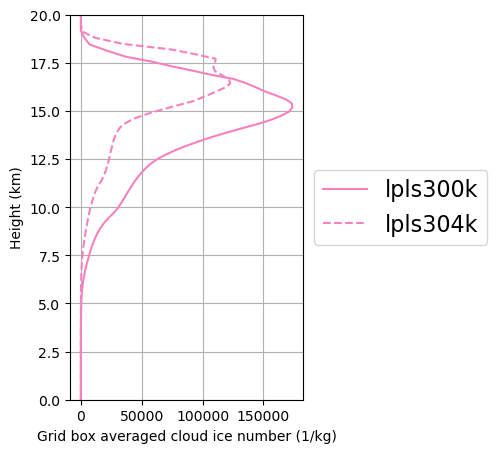

In [56]:
file = run_dir+f"{run}/run/{run}_h0_last5days.nc"
zfile = run_dir+f"{run}/run/{run}_Z3_mean.nc"
var = xr.open_dataset(file)[var_name]
var_savename=var.name
var_longname=var.long_name
var_units=var.units
print("RUN:", var_longname)
var = var.mean(dim=['ncol','time'])
z = xr.open_dataset(zfile).Z3.isel(time=0).isel(x=0).isel(y=0)
z = z/1000

var4 = xr.open_dataset(file.replace("300","304"))[var_name].mean(dim=['ncol','time'])
z4 = xr.open_dataset(zfile.replace("300","304")).Z3.isel(time=0).isel(x=0).isel(y=0)
z4 = z4/1000

fig, ax1 = plt.subplots(1,1,figsize=(3,5))
ax1.plot(var, z, color=cb_colors[3], label=run.split("_")[-1])
ax1.plot(var4, z4, color=cb_colors[3], linestyle="dashed", 
         label=run.replace("300","304").split("_")[-1])
ax1.grid()
ax1.set(
        ylim=ylim,
        # xlim=[180,220],
        xlabel=f"{var_longname} ({var_units})",
        ylabel="Height (km)")
ax1.legend(loc="center left", bbox_to_anchor=(1,0.5), fontsize=16)
plt.savefig(f"../plots/large/{run}_{var_savename.lower()}_profile_last5days.pdf")
print('saved as',run, var_savename)
plt.show()

## microphys joint histogram

Following Martina Kramer and Blaz Gasparini

$ R_{ice}$ vs. ICNC

In [4]:
var_names=["T","CLDICE","NUMICE","Q","NUC","BCU","IWC"]  # "TGCLDIWP"


In [5]:
# file = run_dir+f"{run}/run/{run}_h0_last5days.nc"
ds = xr.open_dataset(file, chunks=chunks)[var_names].isel(time=slice(-20,-1)).isel(ncol=slice(0,20000))
print("getting t<-40 and cldice>qsmall...")
ds = ds.where((ds["T"]<233.15)&(ds.CLDICE>qsmall))
ds.Q

getting t<-40 and cldice>qsmall...


<xarray.DataArray 'Q' (time: 19, lev: 128, ncol: 20000)> Size: 195MB
dask.array<where, shape=(19, 128, 20000), dtype=float32, chunksize=(19, 128, 10000), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 152B 2000-02-22 15:00:00 ... 2000-02-24 21:00:00
Dimensions without coordinates: ncol
Attributes:
    mdims:         1
    units:         kg/kg
    mixing_ratio:  wet
    long_name:     Specific humidity
    cell_methods:  time: point

In [6]:
rice = util.calc_rice(ds.CLDICE, ds.NUMICE)
rice

<xarray.DataArray (time: 19, lev: 128, ncol: 20000)> Size: 195MB
dask.array<mul, shape=(19, 128, 20000), dtype=float32, chunksize=(19, 128, 10000), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 152B 2000-02-22 15:00:00 ... 2000-02-24 21:00:00
Dimensions without coordinates: ncol

In [7]:
icnc = util.calc_ni(ds.NUMICE, ds.Q, ds.lev*100, ds["T"])
icnc = icnc/1e6
icnc

<xarray.DataArray (time: 19, lev: 128, ncol: 20000)> Size: 389MB
dask.array<truediv, shape=(19, 128, 20000), dtype=float64, chunksize=(19, 128, 10000), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 152B 2000-02-22 15:00:00 ... 2000-02-24 21:00:00
Dimensions without coordinates: ncol

In [93]:
rice_flat = rice.values.flatten()

[########################################] | 100% Completed | 20.15 s
[########################################] | 100% Completed | 20.25 s
[########################################] | 100% Completed | 20.32 s


In [94]:
icnc_flat = icnc.values.flatten()

[########################################] | 100% Completed | 24.02 s
[########################################] | 100% Completed | 24.12 s
[########################################] | 100% Completed | 24.22 s


In [95]:
if do_var:
    tracer_name = "RHICE"  # "T", "NUC", "BCU", "IWC", "W_NUC", "NI_NUC"
    print(tracer_name)
    if tracer_name=="NUC" or tracer_name=="BCU":
        nuc = xr.open_dataset(file.split(".eam.h0")[0]+"_"+tracer_name+"_hrs.nc",
                              chunks=chunks)[tracer_name].isel(time=slice(-20,-1)).isel(ncol=slice(0,20000))
        var_flat = nuc.where(ds[tracer_name]>0)
    elif tracer_name=="RHICE":
        var_flat = util.calc_rhice(ds)
    else:
        var_flat = ds[tracer_name]
    print(var_flat)

In [96]:
if do_var:
    var_flat = var_flat.values.flatten()
    var_flat

In [97]:
rice_flat.shape, icnc_flat.shape  # , var_flat.shape

((48640000,), (48640000,))

In [98]:
# rice_plot = np.where((var_flat>=7)&(var_flat<8), rice_flat, np.nan)
# icnc_plot = np.where((var_flat>=7)&(var_flat<8), icnc_flat, np.nan)
# do_var=False

In [99]:
n = np.sum(~np.isnan(rice_flat))
n

3152246

In [100]:
rice_bins=np.linspace(0,100,100)
icnc_bins=np.logspace(-5,2,70)

In [101]:
do_var  # , tracer_name

False

In [102]:
stat='median'
if do_var:
    hist, _, _, _ = stats.binned_statistic_2d(rice_flat,
                                              icnc_flat,
                                              (var_flat),
                                              statistic=stat,
                                              bins=[rice_bins, icnc_bins])
    # hist = np.where(hist>0,hist,np.nan)
else:
    hist, _, _, _ = stats.binned_statistic_2d(rice_flat,
                                              icnc_flat,
                                              None,
                                              statistic='count',
                                              bins=[rice_bins, icnc_bins])
    stat = 'count'
    hist = np.where(hist>0,hist,np.nan)
    hist = hist/n
    print("normalized...")
xbins = (rice_bins[1:]+rice_bins[:-1])/2
ybins = (icnc_bins[1:]+icnc_bins[:-1])/2

normalized...


In [103]:
xbins.shape, ybins.shape, hist.shape

((99,), (69,), (99, 69))

In [104]:
# iwc_hist = xr.open_dataset("IWC_jhist_rice_icnc_bins.nc").IWC_jhist
# iwc_hist

plotting... 
count


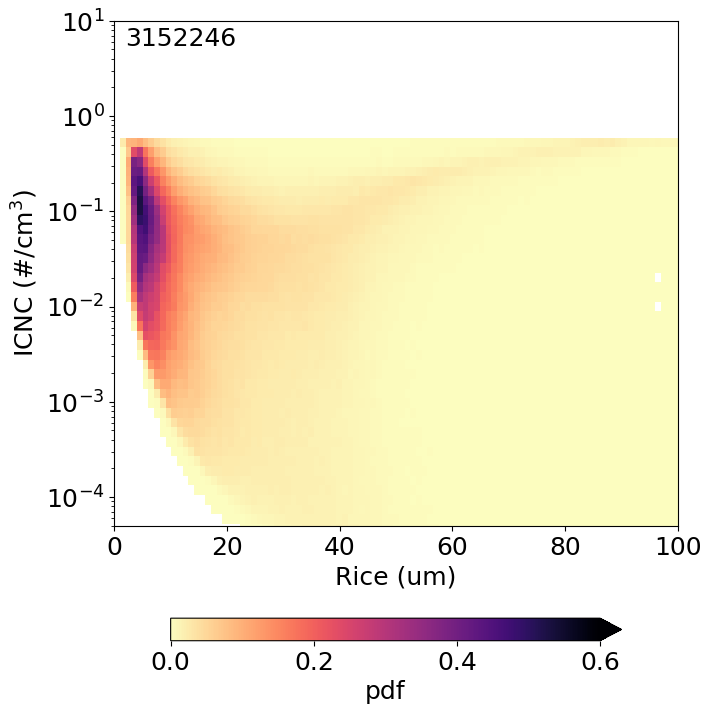

In [105]:
print("plotting... ")
fig, ax = plt.subplots(1, 1, figsize=(7,7), constrained_layout=True)

if do_var:
    print("var")
    cf = ax.contourf(xbins, ybins, hist.T,
                     # (hist*100).T,
                     cmap="cividis",
                     shading='auto',
                     # levels=np.arange(180,220.1,5),
                     # levels=np.arange(0,24.1,2),
                     levels=np.arange(80,120.1,10),
                     # vmin = 0, vmax=24 #0.02, 0.3 std
                     # vmin=170,vmax=220
                     # vmin=1e-7, vmax=10,
                     # norm=mcolors.LogNorm(vmin=1e-7, vmax=0.1),
                     extend="max"
                     )
    plt.colorbar(cf, ax=ax, label=f"{tracer_name} (hr)", location="bottom", shrink=0.8, extend='max')
else:
    print("count")
    cf = ax.pcolormesh(xbins, ybins,
                       (hist*100).T,
                       cmap="magma_r",
                       shading='auto',
                       # levels=[0,1,2,4,8,16,32,48]
                       vmin=0, vmax=0.6,  # 0.02, 0.3 std
                       # levels=np.arange(0,0.6,0.1),
                       )
    plt.colorbar(cf, ax=ax, label="pdf", location="bottom", shrink=0.8, extend='max')
# iwc_hist = xr.open_dataset("IWC_jhist_rice_icnc_bins.nc").IWC_jhist
# ct = ax.contour(xbins, ybins, (iwc_hist).T, colors='k', levels=np.logspace(-6,-1,6))
# ax.text(101, 2e-1, "1e-1 g/m$^3$", fontsize=10)
# ax.text(101, 2e-2, "1e-2 g/m$^3$", fontsize=10)
# ax.text(101, 2e-3, "1e-3 g/m$^3$", fontsize=10)
# ax.text(101, 2e-4, "1e-4 g/m$^3$", fontsize=10)
# ax.text(82,  6e-5, "1e-5 g/m$^3$", fontsize=10)
# ax.text(40,  6e-5, "1e-6 g/m$^3$", fontsize=10)
if not do_var:
    ax.annotate(n, xy=(0.02,0.95), xycoords="axes fraction")
ax.set(yscale='log')
ax.set(xlim=[0,100], ylim=[5e-5,10])
ax.set(ylabel="ICNC (#/cm$^3$)", xlabel="Rice (um)")
if do_var:
    plt.savefig(f"../plots/ams25/micro_hist_run_{run}_{stat}_{tracer_name}.png")
else:
    plt.savefig(f"../plots/ams25/micro_hist_run_{run}_count.png")
plt.show()

In [77]:
rice_bins.shape, icnc_bins.shape, hist.shape

((100,), (70,), (99, 69))

In [78]:
# ds = xr.Dataset({"IWC_jhist":xr.DataArray(hist*100, coords={'RICE_bins':xbins,'ICNC_bins':ybins})}, attrs={'long_name':'IWC jhist RICE vs ICNC for contour plotting'})
# ds

## W_NUC histogram for certain values of ICNC and RICE

In [13]:
plt_ci_type = "insitu" # choose from 'insitu' or 'detrained' or 'recent'
tracer_name = "height" # W_NUC or height

In [4]:
var_names=["T","CLDICE","NUMICE","Q","Z3"]
ds = xr.open_dataset(file, chunks=chunks)[var_names]
print("getting t<-40 and cldice>qsmall...")
ds = ds.where((ds["T"]<233.15)&(ds.CLDICE>qsmall))
ds.Q

getting t<-40 and cldice>qsmall...


<xarray.DataArray 'Q' (time: 40, lev: 128, ncol: 147456)> Size: 3GB
dask.array<where, shape=(40, 128, 147456), dtype=float32, chunksize=(20, 64, 14000), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 320B 2000-02-20 03:00:00 ... 2000-02-25 00:00:00
Dimensions without coordinates: ncol
Attributes:
    mdims:         1
    units:         kg/kg
    mixing_ratio:  wet
    long_name:     Specific humidity
    cell_methods:  time: point

In [5]:
rice = util.calc_rice(ds.CLDICE, ds.NUMICE)
rice

<xarray.DataArray (time: 40, lev: 128, ncol: 147456)> Size: 3GB
dask.array<mul, shape=(40, 128, 147456), dtype=float32, chunksize=(20, 64, 14000), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 320B 2000-02-20 03:00:00 ... 2000-02-25 00:00:00
Dimensions without coordinates: ncol

In [6]:
icnc = util.calc_ni(ds.NUMICE, ds.Q, ds.lev*100, ds["T"])
icnc = icnc/1e6
icnc

<xarray.DataArray (time: 40, lev: 128, ncol: 147456)> Size: 6GB
dask.array<truediv, shape=(40, 128, 147456), dtype=float64, chunksize=(20, 64, 14000), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 320B 2000-02-20 03:00:00 ... 2000-02-25 00:00:00
Dimensions without coordinates: ncol

In [11]:
# var_da = xr.open_dataset(file.split(".eam.h0")[0]+"_"+tracer_name+"_hrs.nc",
#                          chunks=chunks)[tracer_name]
# nuc_da = xr.open_dataset(file.split(".eam.h0")[0]+"_NUC_hrs.nc",
#                               chunks=chunks)["NUC"]
var_da = ds.Z3/1000 # km
var_da

<xarray.DataArray 'Z3' (time: 40, lev: 128, ncol: 147456)> Size: 3GB
dask.array<truediv, shape=(40, 128, 147456), dtype=float32, chunksize=(20, 64, 14000), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 320B 2000-02-20 03:00:00 ... 2000-02-25 00:00:00
Dimensions without coordinates: ncol

In [12]:
if plt_ci_type=="insitu":
    # in-situ formed cirrus
    rice_low, rice_hgh = 0, 7
    icnc_low, icnc_hgh = 1e-2, 1
    print("insitu")
elif plt_ci_type=="detrained":
    # recently detrained cirrus
    rice_low, rice_hgh = 10, 30
    icnc_low, icnc_hgh = 1e-1, 1
    print("detrained")
elif plt_ci_type=="recent":
    # VERY recently detrained cirrus
    rice_low, rice_hgh = 30, 50
    icnc_low, icnc_hgh = 7e-2, 3e1
    print("detrained")
else:
    raise Exception("Need to set one of plt_ci_type to insitu or detrained")
var_da = var_da.where((rice>=rice_low)&(rice>rice_hgh)&(icnc>=icnc_low)&(icnc<icnc_hgh))
var_da

insitu


<xarray.DataArray 'Z3' (time: 40, lev: 128, ncol: 147456)> Size: 3GB
dask.array<where, shape=(40, 128, 147456), dtype=float32, chunksize=(20, 64, 14000), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 320B 2000-02-20 03:00:00 ... 2000-02-25 00:00:00
Dimensions without coordinates: ncol

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,3), constrained_layout=True)
var_da.plot.hist(
                 # bins=np.linspace(0,5,40),
                 bins=np.linspace(12,18,36),
                 ax=ax,
                 # bins=np.logspace(-2.5,1.4,20),
                 # xscale="log",
)
ax.set(xlabel=var_name, ylabel="count")
ax.set(title=f"{plt_ci_type}\n{icnc_low} < ICNC < {icnc_hgh}; {rice_low} < RICE < {rice_hgh}")
plt.savefig(f"../plots/ams25/{var_name}_{plt_ci_type}_histogram_{run}.png")
plt.show()

[#################                       ] | 43% Completed | 340.27 s

## cross section

In [4]:
t=-12

In [5]:
ds = xr.open_dataset(file, chunks=chunks).isel(time=t)[['CLDICE','CLDLIQ','QRS', 'QRL',
                                                        'crm_grid_x','crm_grid_y', 'OMEGA',
                                                        'T','time']]
x = ds.crm_grid_x
y = ds.crm_grid_y
iwc = ds.CLDICE
temp = ds['T']
time = ds.time
print(x.shape, y.shape, time.values)

(147456,) (147456,) 2000-02-23 15:00:00


In [6]:
# w = util.omega2w(ds.OMEGA, ds.lev*100, temp)
w = ds.OMEGA

In [7]:
lw_heating = ds.QRL
sw_heating = ds.QRS
del ds

In [8]:
lw_heating

<xarray.DataArray 'QRL' (lev: 128, ncol: 147456)> Size: 75MB
dask.array<getitem, shape=(128, 147456), dtype=float32, chunksize=(128, 147456), chunktype=numpy.ndarray>
Coordinates:
    time     object 8B 2000-02-23 15:00:00
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
Dimensions without coordinates: ncol
Attributes:
    long_name:          Longwave heating rate
    units:              K/s
    mdims:              1
    Sampling_Sequence:  rad_lwsw
    cell_methods:       time: point

In [9]:
# iwc.mean(dim=['ncol'], skipna=True).plot(y='lev', ylim=[1000,50], yscale='log')

In [10]:
cross_mask = np.where(x < 10, 1, 0)
print(cross_mask.shape)
x0 = x.where(cross_mask)
y0 = y.where(cross_mask)
print(x0.shape, y0.shape)
ncross = np.nansum(cross_mask)
print(ncross)

[########################################] | 100% Completed | 102.28 ms
(147456,)
(147456,) (147456,)
147456


In [11]:
nuc = (
    xr.open_dataset(run_dir + f"{run}/run/{run}_NUC_hrs.nc").sel(time=time, method="nearest").NUC
)
bcu = (
    xr.open_dataset(run_dir + f"{run}/run/{run}_BCU_hrs.nc").sel(time=time, method="nearest").BCU
)
z = (
    xr.open_dataset(run_dir + f"{run}/run/{run}_Z3_mean.nc")
    # xr.open_dataset(run_dir + run + "_Zmean_last5days.nc")
    # .sel(time=time, method="nearest")
    .Z3[0, :, 0, 0]/1000
)

In [12]:
nuc.shape, bcu.shape, z.shape

((128, 147456), (128, 147456), (128,))

In [302]:
iwc_plot = iwc.where(cross_mask[np.newaxis, :])
nuc_plot = nuc.where((iwc>qsmall)&(cross_mask[np.newaxis, :]))
bcu_plot = bcu.where((iwc>qsmall)&(cross_mask[np.newaxis, :]))
qrl_plot = lw_heating.where((iwc>qsmall)&(cross_mask[np.newaxis, :]))
qrs_plot = sw_heating.where((iwc>qsmall)&(cross_mask[np.newaxis, :]))
w_plot = w.where((iwc>qsmall)&(cross_mask[np.newaxis, :]))

[########################################] | 100% Completed | 118.55 ms
[########################################] | 100% Completed | 121.15 ms
[########################################] | 100% Completed | 121.39 ms
[########################################] | 100% Completed | 1.03 sms
[########################################] | 100% Completed | 108.86 ms
[########################################] | 100% Completed | 110.13 ms
[########################################] | 100% Completed | 109.58 ms
[########################################] | 100% Completed | 1.64 sms
[########################################] | 100% Completed | 106.05 ms
[########################################] | 100% Completed | 109.31 ms
[########################################] | 100% Completed | 110.10 ms
[########################################] | 100% Completed | 1.83 sms
[########################################] | 100% Completed | 103.12 ms
[########################################] | 100% Completed | 114.0

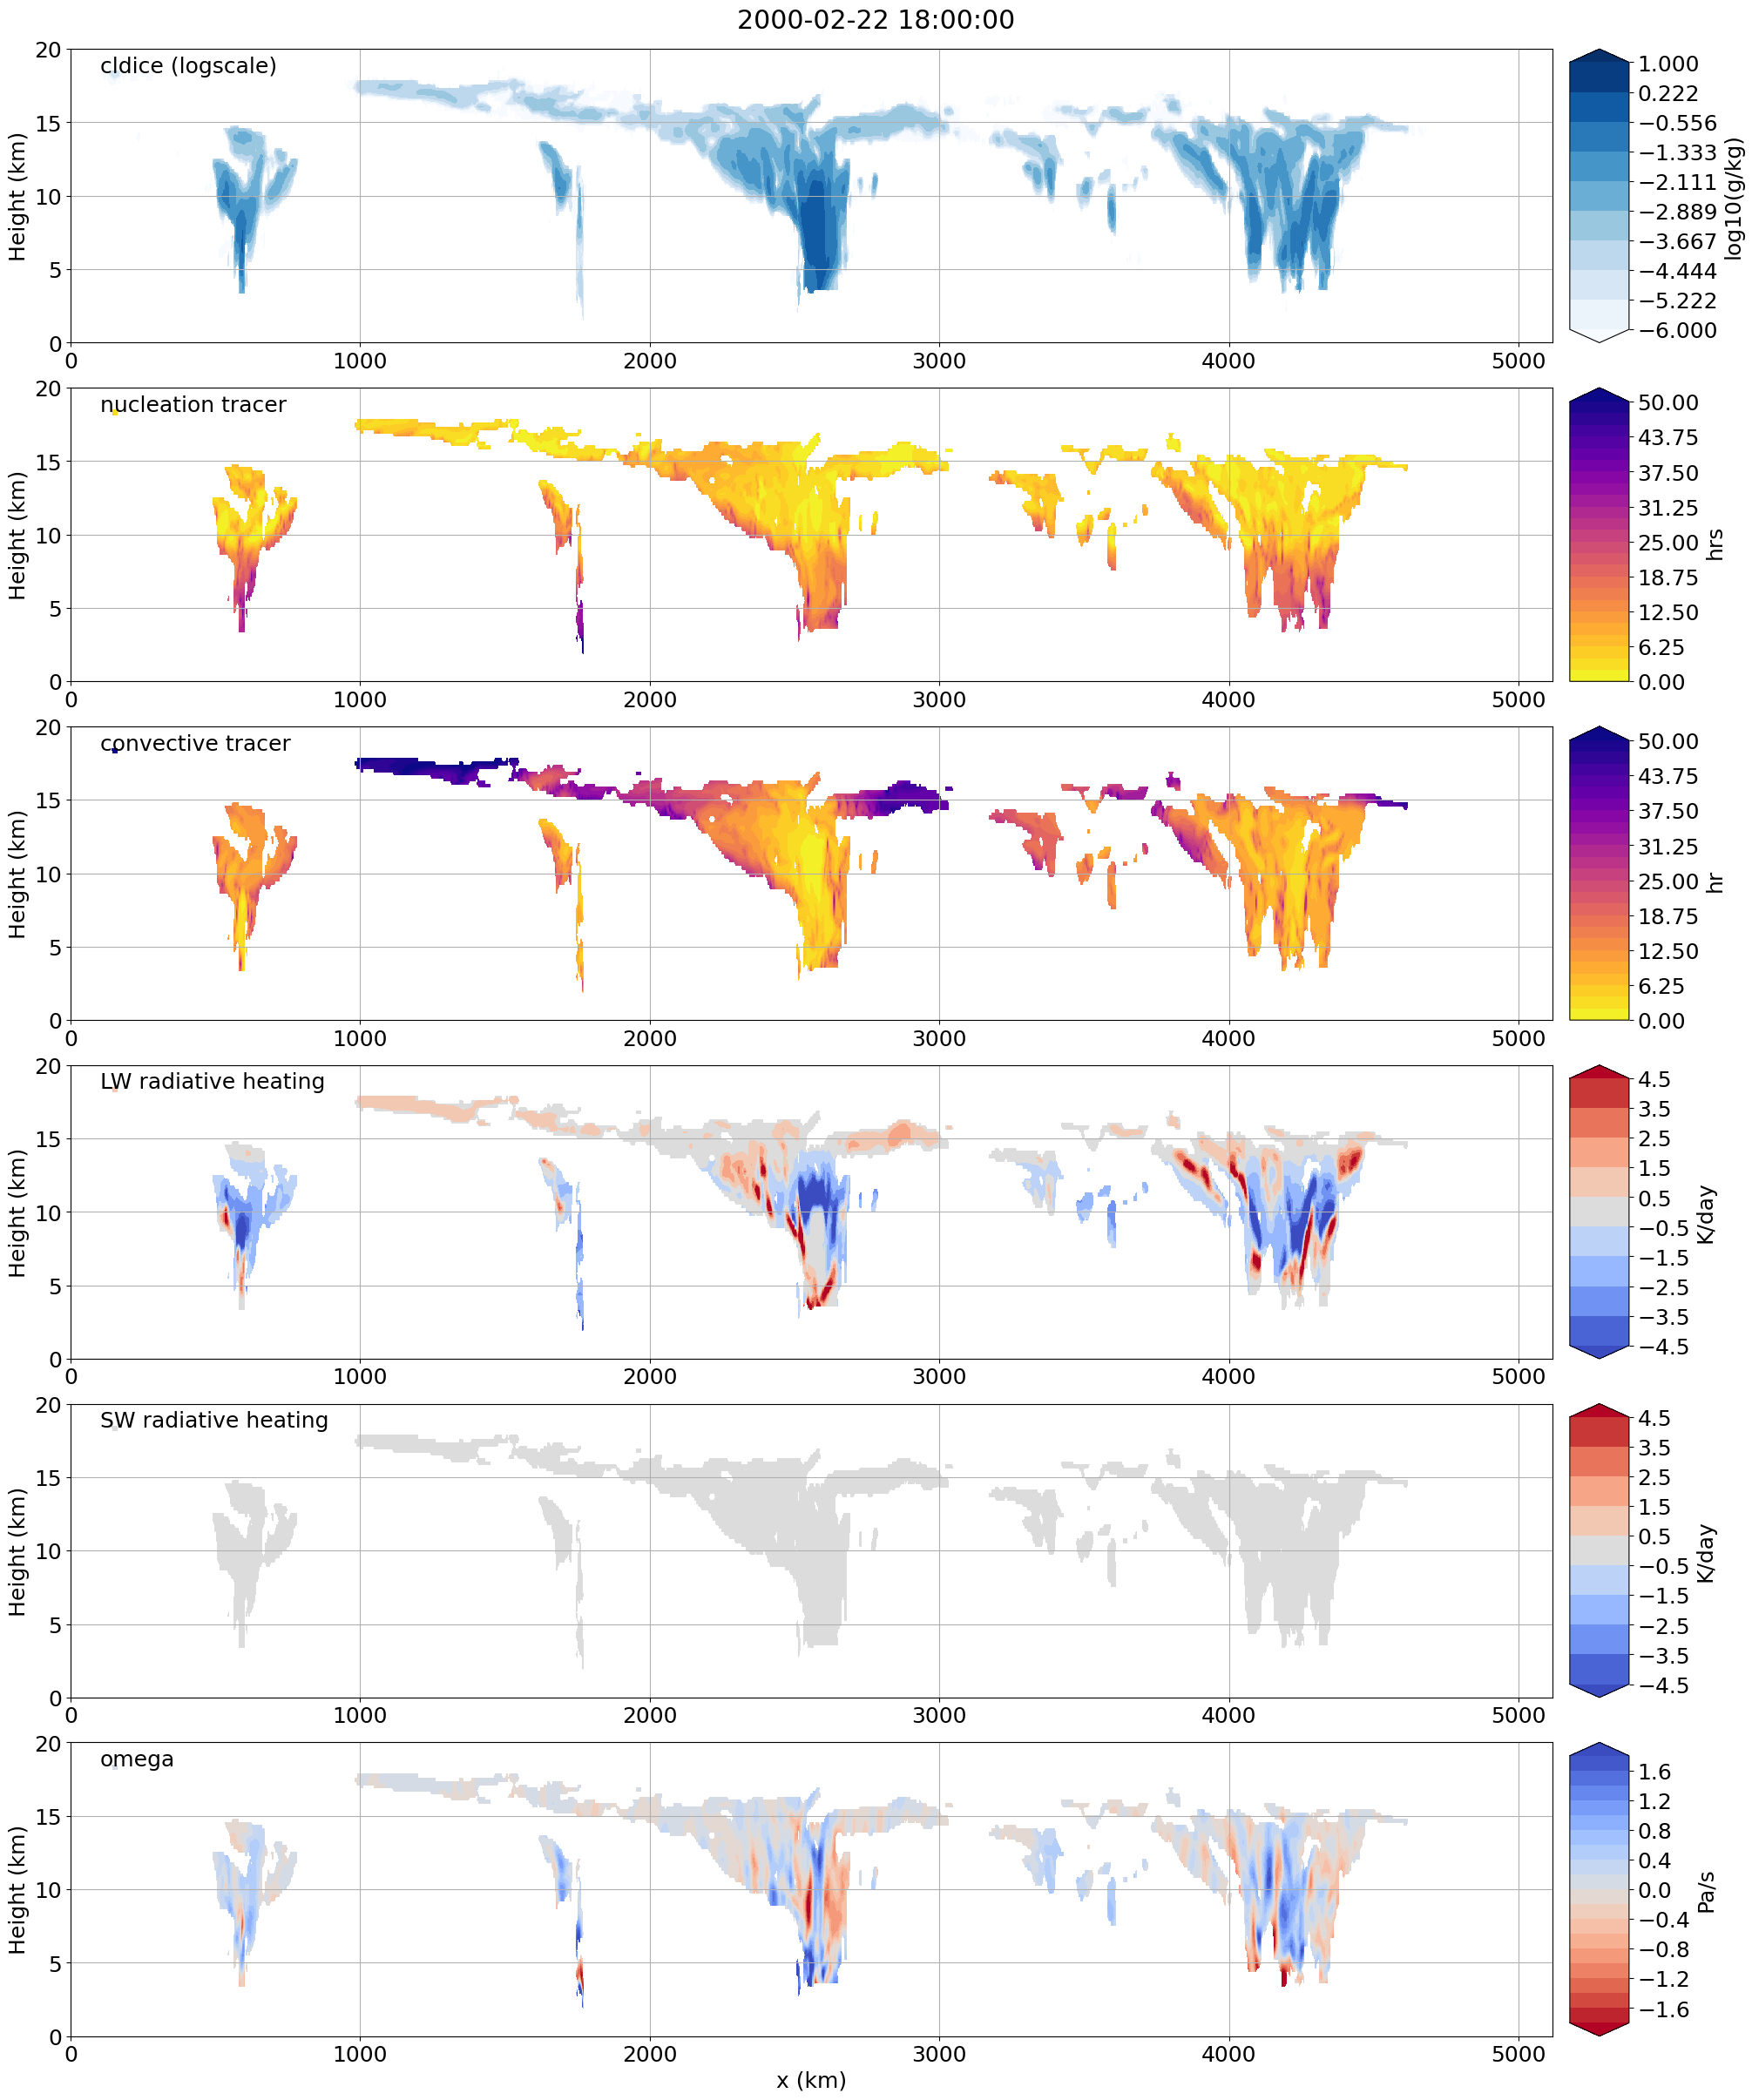

In [303]:
fig = plt.figure(figsize=(20, 24), layout="constrained")
gs = GridSpec(6, 2, figure=fig, width_ratios=[100, 4], hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
cax0 = fig.add_subplot(gs[0, 1])
cf = ax0.contourf(
    y / 1000,
    z,
    np.log10(iwc_plot * 1000),
    levels=np.linspace(-6, 1, 10),
    # vmin=-6, vmax=1,
    extend="both",
    cmap="Blues",
)
plt.colorbar(cf, cax=cax0, label="log10(g/kg)")
ax1 = fig.add_subplot(gs[1, 0])
cax1 = fig.add_subplot(gs[1, 1])
cf = ax1.contourf(
    y / 1000,
    z,
    nuc_plot,
    levels=np.linspace(0, 50, 25),
    # vmin=0, vmax=50,
    extend="max",
    cmap="plasma_r",
)
plt.colorbar(cf, cax=cax1, label="hrs")
ax2 = fig.add_subplot(gs[2, 0])
cax2 = fig.add_subplot(gs[2, 1])
cf = ax2.contourf(
    y / 1000,
    z,
    bcu_plot,
    levels=np.linspace(0, 50, 25),
    # vmin=0, vmax=50,
    extend="max",
    cmap="plasma_r",
)
plt.colorbar(cf, cax=cax2, label="hr")
ax3 = fig.add_subplot(gs[3, 0])
cax3 = fig.add_subplot(gs[3, 1])
cf = ax3.contourf(
    y / 1000,
    z,
    qrl_plot * 3600 * 24,
    levels=np.linspace(-4.5,4.5,10),
    extend="both",
    cmap="coolwarm",
)
plt.colorbar(cf, cax=cax3, label="K/day")
ax4 = fig.add_subplot(gs[4, 0])
cax4 = fig.add_subplot(gs[4, 1])
cf = ax4.contourf(
    y / 1000,
    z,
    qrs_plot * 3600 * 24,
    levels=np.linspace(-4.5, 4.5, 10),
    extend="both",
    cmap="coolwarm",
)
plt.colorbar(cf, cax=cax4, label="K/day")
ax5 = fig.add_subplot(gs[5, 0])
cax5 = fig.add_subplot(gs[5, 1])
cf = ax5.contourf(
    y / 1000,
    z,
    w_plot,
    levels=np.linspace(-1.8, 1.8, 19),
    extend="both",
    cmap="coolwarm_r",
)
plt.colorbar(cf, cax=cax5, label="Pa/s")
ax0.set(ylim=[0, 20],  # xlim=[2000,3600],
        ylabel="Height (km)")
ax1.set(ylim=[0, 20],  # xlim=[2000,3600],
        ylabel="Height (km)")
ax2.set(ylim=[0, 20],  # xlim=[2000,3600],
        ylabel="Height (km)")
ax3.set(ylim=[0, 20],  # xlim=[2000,3600],
        ylabel="Height (km)")
ax4.set(ylim=[0, 20],  # xlim=[2000,3600],
        ylabel="Height (km)")
ax5.set(ylim=[0, 20],  # xlim=[2000,3600],
        ylabel="Height (km)", xlabel="x (km)")
ax0.grid(True)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax5.grid(True)
ax0.annotate("cldice (logscale)", xy=(0.02,0.92), xycoords="axes fraction")
ax1.annotate("nucleation tracer", xy=(0.02,0.92), xycoords="axes fraction")
ax2.annotate("convective tracer", xy=(0.02,0.92), xycoords="axes fraction")
ax3.annotate("LW radiative heating", xy=(0.02,0.92), xycoords="axes fraction")
ax4.annotate("SW radiative heating", xy=(0.02,0.92), xycoords="axes fraction")
ax5.annotate("omega", xy=(0.02,0.92), xycoords="axes fraction")
fig.suptitle(str(nuc.time.values))
time_string = str(time.values).replace(" ","T").split(":")[0]+"h"
print(time_string)
plt.savefig(f"../plots/ams25/cross_section_iwc_nuc_bcu_qrl_qrs_omega_{run}_{time_string}.png")
plt.show()

## IWP or $\tau_{conv}$ vs height

In [13]:
# load the data
xvar_name = "IWP"
tbeg=-6
thres=5e-8  # kg/m3
if xvar_name=="BCU":
    bcu_ds = xr.open_dataset(file.split(".eam.h0")[0]+"_BCU_hrs.nc", chunks=chunks).BCU.isel(time=slice(tbeg,-1))
ds = xr.open_dataset(file, chunks=chunks)[['TGCLDIWP','IWC','T','OMEGA','NUMICE','Q','CLDICE']].isel(time=slice(tbeg,-1))
ds = ds.where(ds.IWC>=thres)
z = xr.open_dataset(file.split(".eam.h0")[0]+"_Z3_mean.nc").Z3[0,:,0,0]
ds

<xarray.Dataset> Size: 3GB
Dimensions:   (time: 5, ncol: 147456, lev: 128)
Coordinates:
  * lev       (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time      (time) object 40B 2000-02-24 09:00:00 ... 2000-02-24 21:00:00
Dimensions without coordinates: ncol
Data variables:
    TGCLDIWP  (time, ncol, lev) float32 377MB dask.array<chunksize=(5, 147456, 128), meta=np.ndarray>
    IWC       (time, lev, ncol) float32 377MB dask.array<chunksize=(5, 128, 147456), meta=np.ndarray>
    T         (time, lev, ncol) float32 377MB dask.array<chunksize=(5, 128, 147456), meta=np.ndarray>
    OMEGA     (time, lev, ncol) float32 377MB dask.array<chunksize=(5, 128, 147456), meta=np.ndarray>
    NUMICE    (time, lev, ncol) float32 377MB dask.array<chunksize=(5, 128, 147456), meta=np.ndarray>
    Q         (time, lev, ncol) float32 377MB dask.array<chunksize=(5, 128, 147456), meta=np.ndarray>
    CLDICE    (time, lev, ncol) float32 377MB dask.array<chunksize=(5, 128, 147456), meta=np.ndarray>
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         debb57d87b
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/work/sturbeville/E3SM/inputdata/atm/cam/inic/ho...
    topography_file:   /glade/work/sturbeville/E3SM/inputdata/atm/cam/topo/US...
    time_period_freq:  hour_3

In [20]:
# calculate variable to plot
stat="median"
cvar_name="IWC"
cvar_label="g/m3"
if cvar_name=="W":
    var_ds = util.omega2w(ds.OMEGA, ds.lev*100, ds['T'])
elif cvar_name=="NI":
    var_ds = util.calc_ni(ds.NUMICE, ds.Q, ds.lev, ds['T'])/1e6
elif cvar_name=="RICE":
    var_ds = util.calc_rice(ds.CLDICE, ds.NUMICE)
elif cvar_name=="IWC":
    var_ds = (ds.IWC)*1000
elif cvar_name=="NUC":
    var_ds = xr.open_dataset(file.split(".eam.h0")[0]+"_NUC_hrs.nc"
                             ).NUC.isel(time=slice(tbeg,-1)
                                        ).where(ds.IWC>=thres)
elif cvar_name=="BCU":
    var_ds = xr.open_dataset(file.split(".eam.h0")[0]+"_BCU_hrs.nc"
                             ).BCU.isel(time=slice(tbeg,-1)
                                        ).where(ds.IWC>=thres)
elif cvar_name=="W_NUC":
    var_ds = xr.open_dataset(file.split(".eam.h0")[0]+"_W_NUC_hrs.nc"
                             ).W_NUC.isel(time=slice(tbeg,-1)
                                          ).where(ds.IWC>=thres)
    # var_ds = util.omega2w(var_ds, var_ds.lev*100, ds['T'])
elif cvar_name=="CLD_FRAC":
    var_ds = xr.where(ds.IWC>=thres,1,0, keep_attrs=True)
var_ds

<xarray.DataArray 'IWC' (time: 5, lev: 128, ncol: 147456)> Size: 377MB
dask.array<mul, shape=(5, 128, 147456), dtype=float32, chunksize=(5, 128, 147456), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 40B 2000-02-24 09:00:00 ... 2000-02-24 21:00:00
Dimensions without coordinates: ncol

In [15]:
print(xvar_name, cvar_name)
if xvar_name=="IWP":
    # organize into IWP percentiles
    x_da = ds.TGCLDIWP.where(ds.TGCLDIWP>0)
    x_bin_edges = np.linspace(0,1,30)
    x_bin_values = np.zeros(x_bin_edges.shape)
elif xvar_name=="BCU":
    x_da = bcu_ds
    x_bin_edges = np.linspace(0,30,25)
    x_bin_values = x_bin_edges
var_binned_by_x = np.zeros((len(x_bin_edges), len(var_ds.lev)))
print(x_bin_edges.shape, var_ds.shape, var_binned_by_x.shape)

# do the first one
print(0, x_bin_values[1])
if stat=="mean":
    var_binned_by_x[0,:] = var_ds.where(x_da<x_bin_values[1]
                                        ).mean(dim=['time','ncol'],
                                               skipna=True)
elif stat=="median":
    var_binned_by_x[0,:] = var_ds.where((x_da<x_bin_values[1])
                                        ).median(dim=['time','ncol'],
                                                 skipna=True)
# do the rest
for i in range(1,len(x_bin_edges)):
    if xvar_name=="IWP":
        x_bin_values[i] = x_da.quantile(x_bin_edges[i]).mean()
    print(i, x_bin_values[i-1], x_bin_values[i])
    if stat=="mean":
        var_binned_by_x[i,:] = var_ds.where((x_da<x_bin_values[i])&
                                            (x_da>=x_bin_values[i-1])
                                            ).mean(dim=['time','ncol'],
                                                   skipna=True)
    elif stat=="median":
        var_binned_by_x[i,:] = var_ds.where((x_da<x_bin_values[i])&
                                            (x_da>=x_bin_values[i-1])
                                            ).median(dim=['time','ncol'],
                                                     skipna=True)
    print(var_binned_by_x[i,40])

IWP IWC
(30,) (5, 128, 147456) (30, 128)
0 0.0
[########################################] | 100% Completed | 2.35 sms
[########################################] | 100% Completed | 2.14 sms
1 0.0 0.00010773160465760157
[########################################] | 100% Completed | 1.84 sms
7.36116198822856e-05
[########################################] | 100% Completed | 1.83 sms
2 0.00010773160465760157 0.00022892675769980997
[########################################] | 100% Completed | 1.75 sms
0.00011022097896784544
[########################################] | 100% Completed | 1.64 sms
3 0.00022892675769980997 0.00038557115476578474
[########################################] | 100% Completed | 1.65 sms
0.00015174009604379535
[########################################] | 100% Completed | 1.74 sms
4 0.00038557115476578474 0.0005937687739537207
[########################################] | 100% Completed | 1.54 sms
0.00016749277710914612
[########################################] | 100% Co

../plots/ams25/IWP_vs_height_IWC_median_5e-08.png


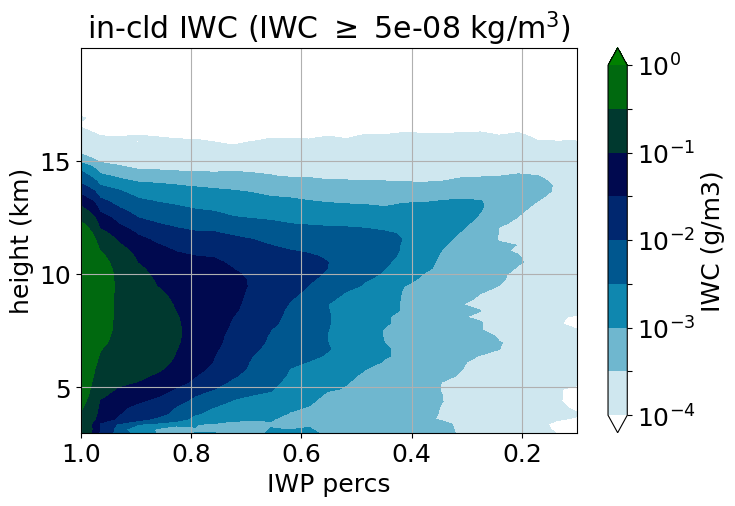

In [21]:
# Height vs IWC percentile
fig, ax = plt.subplots(1,1, figsize=(8,5))
im = ax.contourf(x_bin_edges, z/1000, (var_binned_by_x).T,
                 cmap="ocean_r",
                 # vmin=1e-7, vmax=1,
                 # norm=mcolors.TwoSlopeNorm(0),
                 # norm=mcolors.LogNorm(vmin=2e-4,vmax=0.04),
                 # norm=mcolors.SymLogNorm(linthresh=1, linscale=0.2,
                 #                         vmin=-10.0, vmax=10.0, base=10),
                 # vmin=-5, vmax=5,
                 # vmin=0, vmax=24,
                 # shading='auto',
                 # levels=np.arange(0,120,10),
                 # locator=ticker.LogLocator(subs='all'),
                 # levels=np.arange(-5,5.1,0.5),
                 # levels=np.arange(0,24,1),
                 # levels=np.arange(0,1.01,0.1),
                 # levels=[-2,-1,-0.5,-0.25,0,0.25,0.5,1,2],
                 # levels=np.arange(-50,50,10),
                 levels=np.logspace(-4,0,9),
                 # levels=np.logspace(-4,1,5*2+1),
                 norm=mcolors.LogNorm(),
                 extend="both"
                 )
ax.contour(im, levels=[0], colors='k')
# xticklabels = [f"{i:.1e}" for i in iwp_bin_edges]
# axt = ax.twiny()
# axt.set(xticks=iwp_perc_edges[5::10],
#         xticklabels=xticklabels[5::10])
plt.colorbar(im, ax=ax, location='right',
             label=f"{cvar_name} ({cvar_label})")
ax.set(ylim=[3,20],
       yticks=np.arange(5,20,5),
       ylabel="height (km)")
if xvar_name=="IWP":
    ax.set(xlabel="IWP percs", xlim=[0.1,1])
    ax.invert_xaxis()
else:
    ax.set(xlabel="time since convection", xlim=[0,30])
ax.grid(True)
ax.set(title=f"in-cld {cvar_name} (IWC $\geq$ {thres} kg/m$^3$)")
savename=f"../plots/ams25/{xvar_name}_vs_height_{cvar_name}_{stat}_{thres}.png"
print(savename)
plt.savefig(savename, bbox_inches="tight", pad_inches=0.5, dpi=120)
plt.show()

## in-situ vs recently detrained cirrus clouds properties

In [3]:
# ds = xr.open_dataset(file, chunks=chunks)
# ds

In [4]:
plt_type="both"
var_name = "RHice"
var_units = "%"
tbeg=-6
thres=5e-8  # kg/m3


bcu_ds = xr.open_dataset(file.split(".eam.h0")[0]+"_BCU_hrs.nc", chunks=chunks).BCU.isel(time=slice(tbeg,-1))
nuc_ds = xr.open_dataset(file.split(".eam.h0")[0]+"_NUC_hrs.nc", chunks=chunks).NUC.isel(time=slice(tbeg,-1))

if var_name=="BCU":
    var_ds = xr.open_dataset(file.split(".eam.h0")[0]+"_BCU_hrs.nc", chunks=chunks).isel(time=slice(tbeg,-1)).BCU
    ds = xr.open_dataset(file, chunks=chunks)[["IWC"]].isel(time=slice(tbeg,-1))
    var_ds = var_ds.where(ds.IWC>=thres)
    bins = np.linspace(0,30,30)
elif var_name=="NUC":
    var_ds = xr.open_dataset(file.split(".eam.h0")[0]+"_NUC_hrs.nc", chunks=chunks).isel(time=slice(tbeg,-1)).NUC
    ds = xr.open_dataset(file, chunks=chunks)[["IWC"]].isel(time=slice(tbeg,-1))
    var_ds = var_ds.where(ds.IWC>=thres)
    bins = np.linspace(0,30,30)
elif var_name=="W_NUC":
    var_ds = xr.open_dataset(file.split(".eam.h0")[0]+"_W_NUC_hrs.nc", chunks=chunks).isel(time=slice(tbeg,-1)).W_NUC
    ds = xr.open_dataset(file, chunks=chunks)[["IWC"]].isel(time=slice(tbeg,-1))
    var_ds = var_ds.where(ds.IWC>=thres)
    bins = np.linspace(-5,5,20)
elif var_name=="IWC":
    var_ds = xr.open_dataset(file, chunks=chunks)[[var_name]].isel(time=slice(tbeg,-1))
    var_ds = var_ds.where(var_ds.IWC>=thres).IWC*1000
    bins = np.logspace(-7,0,15)
# elif var_name=="IWP":
#     var_ds = xr.open_dataset(file, chunks=chunks)[["TGCLDIWP", "IWC"]].isel(time=slice(tbeg,-1))
#     var_ds = var_ds.where((var_ds.IWC>=thres).any())
elif var_name=="NI":
    ds = xr.open_dataset(file, chunks=chunks)[["IWC","CLDICE","T","Q","OMEGA","NUMICE"]].isel(time=slice(tbeg,-1))
    var_ds = util.calc_ni(ds.NUMICE, ds.Q, ds.lev, ds['T'])/1e6
    bins = np.logspace(-7,1,15)
elif var_name=="RICE":
    ds = xr.open_dataset(file, chunks=chunks)[["IWC","CLDICE","T","Q","OMEGA","NUMICE"]].isel(time=slice(tbeg,-1))
    var_ds = util.calc_rice(ds.CLDICE, ds.NUMICE)
    bins = np.linspace(0,120,40)
elif var_name=="RHice":
    ds = xr.open_dataset(file, chunks=chunks)[["IWC","T","Q"]].isel(time=slice(tbeg,-1))
    var_ds = util.calc_rhice(ds)
    bins = np.linspace(60,130,40)
elif var_name=="W":
    ds = xr.open_dataset(file, chunks=chunks)[["IWC","CLDICE","T","Q","OMEGA","NUMICE"]].isel(time=slice(tbeg,-1))
    var_ds = util.omega2w(ds.OMEGA, ds.lev*100, ds['T'])
    bins = np.linspace(-5,5,20)
elif var_name=="WSUB" or var_name=="W_SEC":
    var_ds = xr.open_dataset(file, chunks=chunks)[[var_name,"IWC"]].isel(time=slice(tbeg,-1))
    var_ds = var_ds.where(var_ds.IWC>=thres)[var_name]
    bins = np.linspace(-0.2,0.2,20)
elif var_name=="height":
    var_ds = xr.open_dataset(file, chunks=chunks)[["Z3","IWC"]].isel(time=slice(tbeg,-1))
    var_ds = var_ds.where(var_ds.IWC>=thres).Z3/1000
    bins=np.linspace(5,18,26)
else:
    var_ds = xr.open_dataset(file, chunks=chunks)[[var_name,"IWC"]].isel(time=slice(tbeg,-1))
    var_ds = var_ds.where(var_ds.IWC>=thres)
    bins=25

if plt_type=="insitu":
    var_ds = var_ds.where((bcu_ds>24)&(nuc_ds<2))
elif plt_type=="detrained":
    var_ds = var_ds.where((bcu_ds>2)&(bcu_ds<6))
elif plt_type=="both":
    ins_ds = var_ds.where((bcu_ds>24)&(nuc_ds<2))
    det_ds = var_ds.where((bcu_ds>2)&(bcu_ds<6))
# var_ds = var_ds[var_name]
var_ds

<xarray.DataArray (time: 5, lev: 128, ncol: 147456)> Size: 755MB
dask.array<mul, shape=(5, 128, 147456), dtype=float64, chunksize=(5, 128, 20000), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 40B 2000-02-24 09:00:00 ... 2000-02-24 21:00:00
Dimensions without coordinates: ncol

In [5]:
# np.nanmin(var_ds), np.nanmax(var_ds), np.nanmean(var_ds)

In [6]:
if plt_type=="both":
    print("both insitu and detrained")
    print(ins_ds.shape, det_ds.shape)
    n = np.prod(ins_ds.shape)
    n_ins = ins_ds.count().values
    n_det = det_ds.count().values
    print(n_ins, n_det)
    hist_ins, bins = np.histogram((ins_ds.values.flatten()),
                                  bins=bins,
                                  density=False)
    hist_det, _ = np.histogram((det_ds.values.flatten()),
                               bins=bins,
                               density=False)
    hist_ins = hist_ins/n_ins
    hist_det = hist_det/n_det
else:
    print(plt_type)
    hist, bins = np.histogram((var_ds.values.flatten()),
                              bins=bins,
                              density=True)

both insitu and detrained
(5, 128, 147456) (5, 128, 147456)
[########################################] | 100% Completed | 13.98 ss
[########################################] | 100% Completed | 14.08 s
[########################################] | 100% Completed | 9.62 sms
[########################################] | 100% Completed | 9.72 s
216893 2251235
[########################################] | 100% Completed | 9.82 sms
[########################################] | 100% Completed | 9.92 s
[########################################] | 100% Completed | 9.58 sms
[########################################] | 100% Completed | 9.68 s


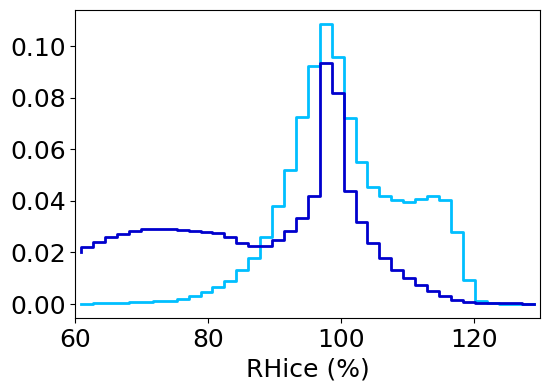

In [7]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
bin_widths = bins[1:]-bins[:-1]
bin_mids = (bins[1:]+bins[:-1])/2
if plt_type=="both":
    t=0
    ax.step(bin_mids[t:], hist_ins[t:], color="deepskyblue", label="in-situ", lw=2)
    ax.step(bin_mids[t:], hist_det[t:], color="mediumblue", label="detrained", lw=2)
    # ax.legend()
else:
    ax.bar(bin_mids, hist, width=bin_widths)
ax.set(xlabel=f"{var_name} ({var_units})")
# title=f"{plt_type} cirrus"
ax.set(xlim=[bins[0], bins[-1]])
# ax.set(ylim=[1e-5,1])
# ax.set(ylim=[0,0.004])
# ax.set(yscale='log')
if var_name=="IWC" or var_name=="NI":
    ax.set(xscale='log')
plt.savefig(f"../plots/ams25/cirrus_{plt_type}_hist_{var_name}.png", dpi=150,
            bbox_inches="tight", pad_inches=0.5)
plt.show()

#

## other plots


In [5]:
# Scatter plots
ds = xr.open_dataset(file.split("_h0")[0]+".eam.h1.2000-01-01-00000.nc")
ds

<xarray.Dataset> Size: 6GB
Dimensions:        (ncol: 147456, lev: 128, ilev: 129, swband: 14, lwband: 16,
                    P3_input_dim: 16, P3_output_dim: 32, time: 201, nbnd: 2)
Coordinates:
  * lev            (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 991.0 994.9 998.5
  * ilev           (ilev) float64 1kB 2.255 2.905 3.555 ... 992.9 997.0 1e+03
  * swband         (swband) float64 112B 2.925e+03 3.625e+03 ... 1.71e+03
  * lwband         (lwband) float64 128B 130.0 375.0 ... 2.535e+03 2.965e+03
  * P3_input_dim   (P3_input_dim) int32 64B 1 2 3 4 5 6 7 ... 11 12 13 14 15 16
  * P3_output_dim  (P3_output_dim) int32 128B 1 2 3 4 5 6 ... 27 28 29 30 31 32
  * time           (time) object 2kB 2000-01-01 00:00:00 ... 2000-02-20 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/75)
    lat            (ncol) float64 1MB ...
    lon            (ncol) float64 1MB ...
    area           (ncol) float64 1MB ...
    hyam           (lev) float64 1kB ...
    hybm           (lev) float64 1kB ...
    P0             float64 8B ...
    ...             ...
    TMQ            (time, ncol) float32 119MB ...
    TREFHT         (time, ncol) float32 119MB ...
    TS             (time, ncol) float32 119MB ...
    WINDSPD_10M    (time, ncol) float32 119MB ...
    crm_grid_x     (time, ncol) float32 119MB ...
    crm_grid_y     (time, ncol) float32 119MB ...
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         1a788d1576
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/work/sturbeville/E3SM/inputdata/atm/cam/inic/ho...
    topography_file:   /glade/work/sturbeville/E3SM/inputdata/atm/cam/topo/US...
    time_period_freq:  hour_6

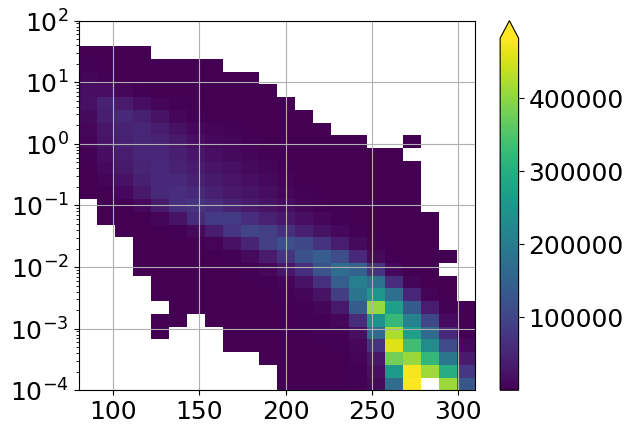

In [17]:
plt.hist2d(ds.FLUT.values.flatten(), (ds.TGCLDIWP.values.flatten()),
           bins=[np.linspace(80,310,23),np.logspace(-4,2,30)], density=False,
           cmin=1, cmax=5e5)
# plt.ylim([-4,2])
# n = np.prod(ds.FLUT.shape)
plt.yscale("log")
plt.grid()
plt.colorbar(extend="max")
plt.show()

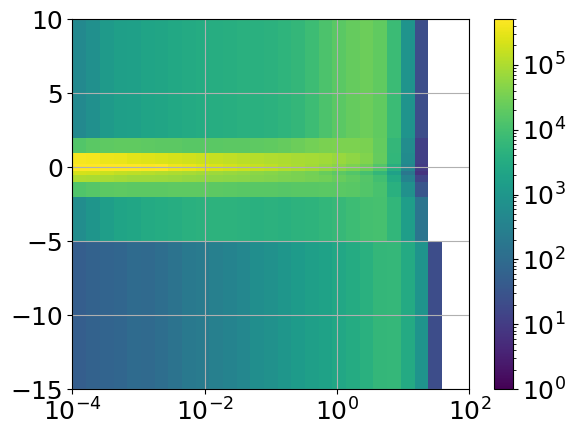

In [94]:
plt.hist2d(ds.TGCLDIWP.values.flatten(), (ds.OMEGA500.values.flatten()),
           bins=[np.logspace(-4,2,30),[-15,-5,-2,-1,-0.5,-0.25,0.25,1,2,10]],
           # density=True, 
           norm=mcolors.LogNorm(vmin=1,vmax=5e5),
          )
# plt.ylim([-4,2])
# n = np.prod(ds.FLUT.shape)
plt.xscale("log")
plt.grid()
plt.colorbar()
plt.show()

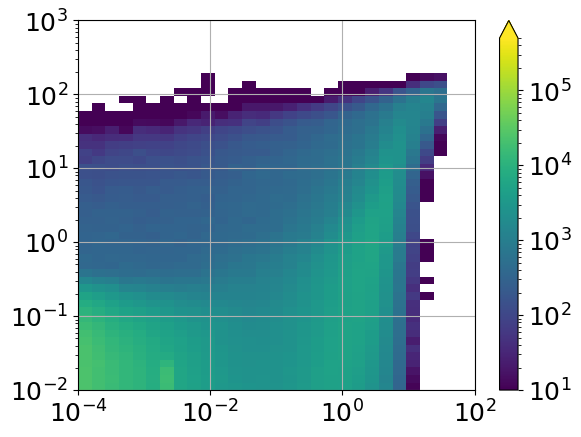

In [95]:
plt.hist2d(ds.TGCLDIWP.values.flatten(), (ds.PRECL.values.flatten())*rain_factor,
           bins=[np.logspace(-4,2,30),np.logspace(-2,3)], density=False,
           norm=mcolors.LogNorm(vmin=10,vmax=5e5),
           )
# plt.ylim([-4,2])
# n = np.prod(ds.FLUT.shape)
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.colorbar(extend="max")
plt.show()

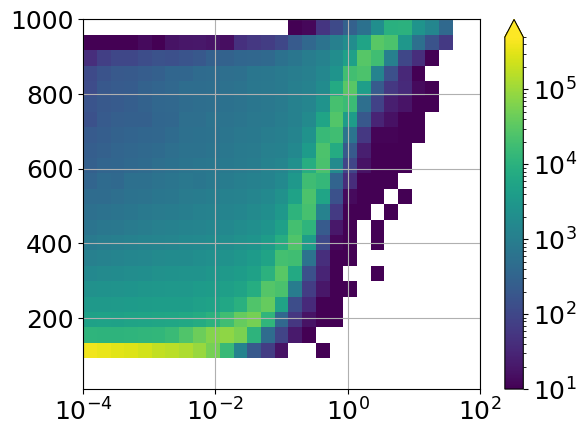

In [100]:
plt.hist2d(ds.TGCLDIWP.values.flatten(), (ds.FSUTOA.values.flatten()),
           bins=[np.logspace(-4,2,30),np.linspace(10,1000,25)], density=False,
           norm=mcolors.LogNorm(vmin=10,vmax=5e5))
plt.xscale("log")
plt.grid()
plt.colorbar(extend="max")
plt.show()

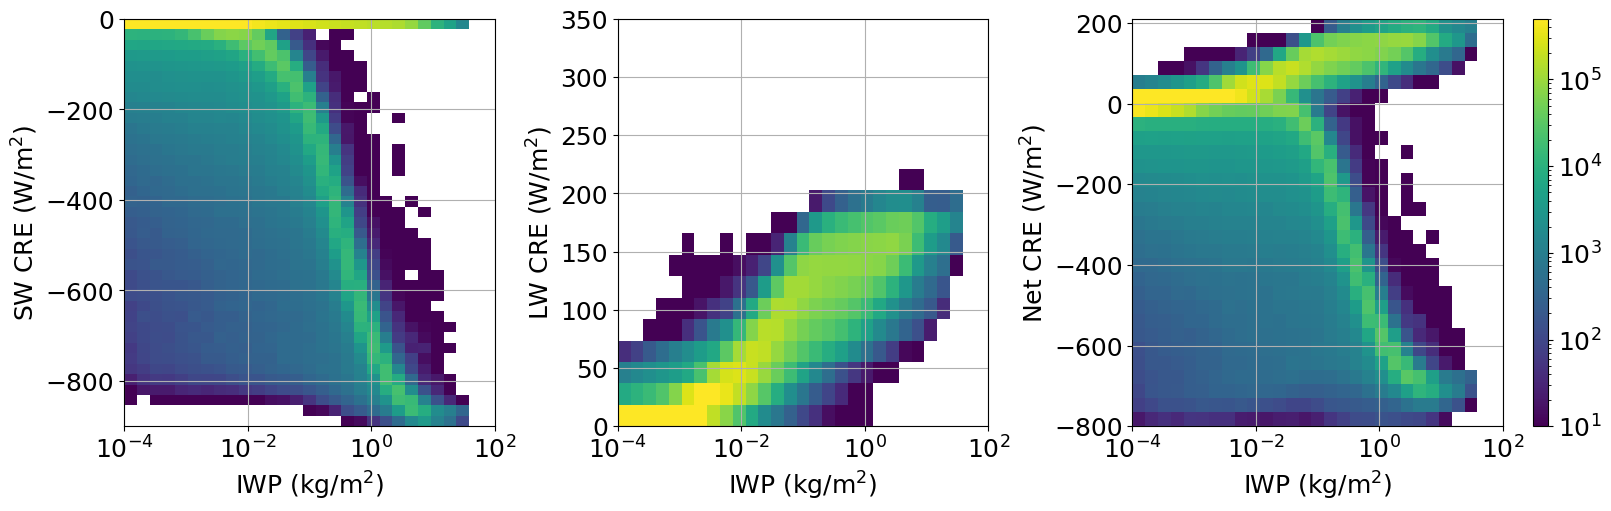

In [131]:
fig, ax = plt.subplots(1, 4, figsize=(16,5),
                       width_ratios=[100,100,100,4],
                       constrained_layout=True)
_,_,_,im = ax[0].hist2d(ds.TGCLDIWP.values.flatten(), (ds.SWCF.values.flatten()),
                        bins=[np.logspace(-4,2,30),np.linspace(-900,0,40)], density=False,
                        norm=mcolors.LogNorm(vmin=10,vmax=5e5))
ax[1].hist2d(ds.TGCLDIWP.values.flatten(), (ds.LWCF.values.flatten()),
             bins=[np.logspace(-4,2,30),np.linspace(0,350,20)], density=False,
             norm=mcolors.LogNorm(vmin=10,vmax=5e5))
ax[2].hist2d(ds.TGCLDIWP.values.flatten(), (ds.LWCF.values.flatten()+ds.SWCF.values.flatten()),
             bins=[np.logspace(-4,2,30),np.linspace(-800,210,30)], density=False,
             norm=mcolors.LogNorm(vmin=10,vmax=5e5))
cbar = plt.colorbar(im, cax=ax[-1])
for axis in ax[:-1]:
    axis.set(xscale="log", xlabel="IWP (kg/m$^2$)")
    axis.grid(True)
ax[0].set(ylabel="SW CRE (W/m$^2$)")
ax[1].set(ylabel="LW CRE (W/m$^2$)")
ax[2].set(ylabel="Net CRE (W/m$^2$)")
plt.show()